# Singapore General Elections 2015 vs. General Elections 2020

This notebook serves to give an overview of the Singapore General Elections 2015 and 2020 through visualisations. 

We will first look at the GE2015 data sets, visualising the results on a bar graph, plotting out the electoral boundaries and viewing the results on a heatmap. 

Next, we will perform a similar analysis on the GE2020 data sets to see the changes since the GE2015.

Lastly, we will recreate the GE2020 results on an interactive map using folium.

## Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import geopandas as gpd
from shapely.geometry import Point,polygon
import fiona
import adjustText as aT
import requests
from bs4 import BeautifulSoup
import folium
import altair as alt

%matplotlib inline
pd.options.mode.chained_assignment = None

C:\Users\sirus\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Looking through the GE2015 data set 

In [2]:
# reading the data set
df = pd.read_csv('parliamentary-general-election-results-by-candidate.csv')

In [3]:
# verifying the top 5 rows
df.head()

,year,constituency,constituency_type,candidates,party,vote_count,vote_percentage
0,1955,Bukit Panjang,na,Goh Tong Liang,PP,3097,0.7221
1,1955,Bukit Panjang,na,Lim Wee Toh,SLF,1192,0.2779
2,1955,Bukit Timah,na,S. F. Ho,PP,722,0.1162
3,1955,Bukit Timah,na,Lim Ching Siong,PAP,3259,0.5245
4,1955,Bukit Timah,na,A. N. Mitra,SLF,924,0.1488


In [4]:
# checking data types 
df.dtypes

year                  int64
constituency         object
constituency_type    object
candidates           object
party                object
vote_count           object
vote_percentage      object
dtype: object

In [5]:
# checking for missing data
df.isnull().sum()

year                 0
constituency         0
constituency_type    0
candidates           0
party                0
vote_count           0
vote_percentage      0
dtype: int64

vote_count and vote_percentage should have data types int and float respectively. The reason why they are not is due to the presence of 'na' for constituencies not contested for resulting in a walkover. 

Refer to this [site](https://data.gov.sg/dataset/parliamentary-general-election-results) for the data dictionary.

In [6]:
# replacing 'na' with 0s
df['vote_count'] = df['vote_count'].apply(lambda x : 0 if x =='na' else x)
df['vote_percentage'] = df['vote_percentage'].apply(lambda x : 0 if x =='na' else x)

In [7]:
# converting data types for vote_count and vote_percentage
df = df.astype({'vote_count': int, 'vote_percentage': float})

In [8]:
# multiplying vote_percentage by 100
df['vote_percentage'] = [x*100 for x in df['vote_percentage']]

In [9]:
# verifying the changes
df.dtypes

year                   int64
constituency          object
constituency_type     object
candidates            object
party                 object
vote_count             int32
vote_percentage      float64
dtype: object

In [10]:
# extracting electorial results from 2015
df2015 = df[df['year'] == 2015]
df2015.head()

,year,constituency,constituency_type,candidates,party,vote_count,vote_percentage
1414,2015,Aljunied,GRC,Chen Show Mao | Sylvia Lim | Low Thia Khiang |...,WP,70050,50.96
1415,2015,Aljunied,GRC,Chau Eng Leong | K Muralidharan Pillai | Lye T...,PAP,67424,49.04
1416,2015,Ang Mo Kio,GRC,Ang Hin Kee | David Darryl Wilson | Gan Thiam ...,PAP,135316,78.64
1417,2015,Ang Mo Kio,GRC,Goh Keow Wah | Jesse Loo Hoe Bock | Roy Ngerng...,RP,36758,21.36
1418,2015,Bishan-Toa Payoh,GRC,Chee Hong Tat | Chong Kee Hiong | Ng Eng Hen |...,PAP,86701,73.59


In [11]:
# total number of votes
df2015['vote_count'].sum()

2260379

There were a total of 2260379 valid votes for GE2015.

In [12]:
# different parties
df2015['party'].unique()

array(['WP', 'PAP', 'RP', 'SPP', 'SDP', 'Independent', 'PPP', 'SGF',
       'NSP', 'SDA'], dtype=object)

There were a total of 9 different parties and along with some independent candidates.

In [13]:
# independent candidates
df2015[df2015['party'] == 'Independent']

,year,constituency,constituency_type,candidates,party,vote_count,vote_percentage
1422,2015,Bukit Batok,SMC,Samir Salim Neji,Independent,150,0.60
1460,2015,Radin Mas,SMC,Han Hui Hui,Independent,2630,10.03


There were only 2 independent candidates who were contesting for SMCs in Bukit Batok and Radin Mas. 

In [14]:
# extracting PAP data by constituency
pap2015 = df2015[df2015['party'] == 'PAP']
pap2015.head()

,year,constituency,constituency_type,candidates,party,vote_count,vote_percentage
1415,2015,Aljunied,GRC,Chau Eng Leong | K Muralidharan Pillai | Lye T...,PAP,67424,49.04
1416,2015,Ang Mo Kio,GRC,Ang Hin Kee | David Darryl Wilson | Gan Thiam ...,PAP,135316,78.64
1418,2015,Bishan-Toa Payoh,GRC,Chee Hong Tat | Chong Kee Hiong | Ng Eng Hen |...,PAP,86701,73.59
1420,2015,Bukit Batok,SMC,David Ong Kim Huat,PAP,18234,73.02
1424,2015,Bukit Panjang,SMC,Teo Ho Pin,PAP,21954,68.38


In [15]:
# verifying the new data set
pap2015.dtypes

year                   int64
constituency          object
constituency_type     object
candidates            object
party                 object
vote_count             int32
vote_percentage      float64
dtype: object

In [16]:
# checking the highest vote_count for PAP
pap2015[pap2015['vote_count'] == pap2015['vote_count'].max()]

,year,constituency,constituency_type,candidates,party,vote_count,vote_percentage
1416,2015,Ang Mo Kio,GRC,Ang Hin Kee | David Darryl Wilson | Gan Thiam ...,PAP,135316,78.64


In [17]:
# extracting Opposition data by constituency
opp2015 = df2015[df2015['party'] != 'PAP']
opp2015.head()

,year,constituency,constituency_type,candidates,party,vote_count,vote_percentage
1414,2015,Aljunied,GRC,Chen Show Mao | Sylvia Lim | Low Thia Khiang |...,WP,70050,50.96
1417,2015,Ang Mo Kio,GRC,Goh Keow Wah | Jesse Loo Hoe Bock | Roy Ngerng...,RP,36758,21.36
1419,2015,Bishan-Toa Payoh,GRC,"Law Kim Hwee | Long YaoGuang, Don Bryan | Moha...",SPP,31108,26.41
1421,2015,Bukit Batok,SMC,Sadasivam V,SDP,6588,26.38
1422,2015,Bukit Batok,SMC,Samir Salim Neji,Independent,150,0.60


In [18]:
# verifying the new data set
opp2015.dtypes

year                   int64
constituency          object
constituency_type     object
candidates            object
party                 object
vote_count             int32
vote_percentage      float64
dtype: object

In [19]:
# checking the highest vote_count for Opposition parties
opp2015[opp2015['vote_count'] == opp2015['vote_count'].max()]

,year,constituency,constituency_type,candidates,party,vote_count,vote_percentage
1414,2015,Aljunied,GRC,Chen Show Mao | Sylvia Lim | Low Thia Khiang |...,WP,70050,50.96


## Results from GE2015

Here we will look at each constituency for 2 different types of electorial divisions, namely Group Representation Constituencies (GRCs) and Single Member Constituencies (SMCs). GRCs are made up of 4 to 5 different members including at least 1 Malay, Indian or minority race so that there is a reprensentation of minority in the Parliament. There are a total of 16 GRCs and 13 SMCs to be contested for in the General Elections 2015. We will look at votes for the main ruling party, People's Action Party (PAP) against the other Opposition parties. 

In [20]:
# function to plot subplots between PAP and the Opposition parties for different type of electorial divisions 
def subplot_results(df_pap, df_opp, div_type):
    fig, ax = plt.subplots(1, 2, figsize=(8, 8), sharex=True, sharey=True)
    ax[0].set_xlim(0, 100)
    
    # title
    if div_type == 'GRC':
        fig.suptitle('Percentage of Votes in Each Constituency (%) for Group Representation Constituencies (GRCs)\n\n' + "People's Action Party vs. Opposition")
    else:
        fig.suptitle('Percentage of Votes in Each Constituency (%) for Single Member Consituencies (SMCs)\n\n' + "People's Action Party vs. Opposition")

    # plotting PAP vote percentages for electorial division type
    sns.barplot(y = df_pap[df_pap['constituency_type'] == div_type]['constituency'], x = df_pap['vote_percentage'], ax=ax[0], ci=None)
    # 50% vertical line
    ax[0].axvline(50)
    
    # plotting Opposition vote percentages for electorial division type
    sns.barplot(y = df_opp[df_opp['constituency_type'] == div_type]['constituency'], x = df_opp['vote_percentage'], ax=ax[1], ci=None)
    # 50% vertical line
    ax[1].axvline(50)
    
    return

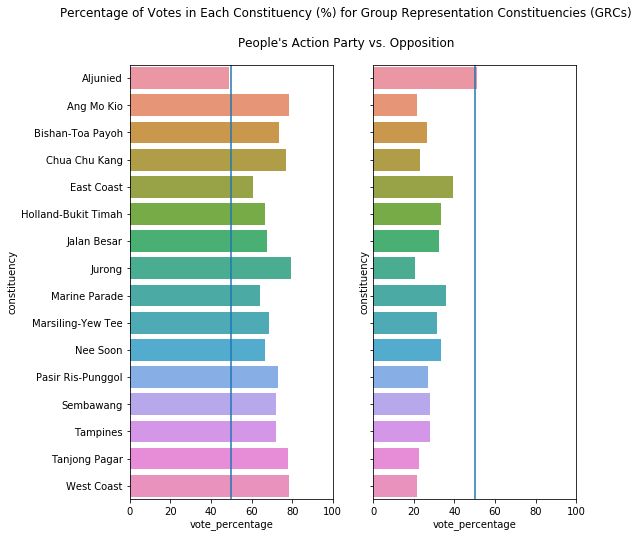

In [21]:
# plot of vote percentages between the PAP and the other opposition parties for GRCs
subplot_results(pap2015, opp2015, 'GRC')

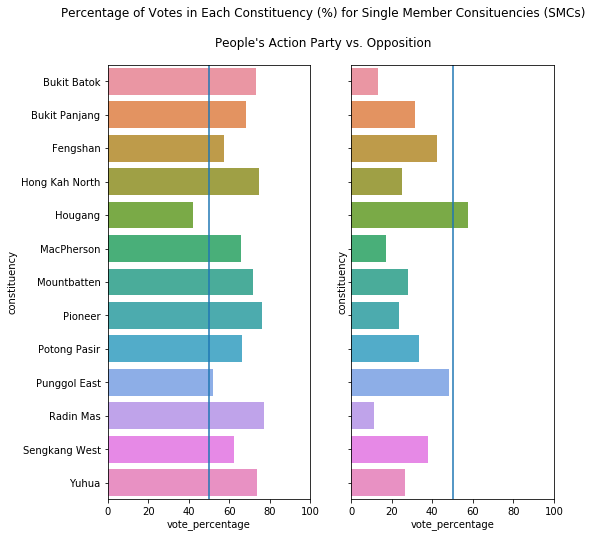

In [22]:
# plot of vote percentages between the PAP and the other opposition parties for SMCs
subplot_results(pap2015, opp2015, 'SMC')

As all the GRCs and almost all SMCs were contested with only 2 parties or 2 members, I included a vertical line at the 50% mark to clearly show if PAP or an Opposition party won that constituency. From the 2 plots above, we see that the Opposition party won the Aljunied GRC and the Hougang SMC. 

In [23]:
opp2015[opp2015['vote_percentage'] > 50]

,year,constituency,constituency_type,candidates,party,vote_count,vote_percentage
1414,2015,Aljunied,GRC,Chen Show Mao | Sylvia Lim | Low Thia Khiang |...,WP,70050,50.96
1436,2015,Hougang,SMC,Png Eng Huat,WP,13027,57.66


In [24]:
pap2015[(pap2015['vote_percentage'] > 50) & (pap2015['vote_percentage'] < 60)]

,year,constituency,constituency_type,candidates,party,vote_count,vote_percentage
1429,2015,Fengshan,SMC,Cheryl Chan Wei Ling,PAP,12417,57.50
1458,2015,Punggol East,SMC,Charles Chong You Fook,PAP,16977,51.77


The Worker's Party was the opposition party which won the Aljunied GRC and the Hougang SMC. We also see that throughout the constituencies, apart from the 2 won by the Opposition, the PAP was able to get more than 60% of the votes except for Fengshan and Punggol East. If the Opposition wants to try for more seats in the Parliament, one strategy would be to target Fengshan and Punggol East as their losses were marginal.

## Electoral Boundaries GE2015

In [25]:
# reading the geographical data of GE2015
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
bd2015 = gpd.read_file('electoral-boundary-2015-kml.kml', driver='KML')

In [26]:
# verifying the top 5 rows
bd2015.head()

,Name,Description,geometry
0,kml_1,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((103.90079 1.36946 0.00000, 103.900..."
1,kml_2,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((103.73560 1.37561 0.00000, 103.735..."
2,kml_3,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((103.80590 1.41110 0.00000, 103.806..."
3,kml_4,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((103.86500 1.32931 0.00000, 103.865..."
4,kml_5,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((103.84053 1.44203 0.00000, 103.840..."


In [27]:
# creating a 'constituency' column for labels
bd2015['constituency'] = [x.split('>')[12].split('<')[0] for x in bd2015['Description']]

In [28]:
# creating a 'centroid' column for labelling
bd2015['centroid'] = bd2015['geometry'].centroid

In [29]:
# verifying the columns
bd2015.head()

,Name,Description,geometry,constituency,centroid
0,kml_1,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((103.90079 1.36946 0.00000, 103.900...",HOUGANG,POINT (103.89491 1.36840)
1,kml_2,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((103.73560 1.37561 0.00000, 103.735...",HONG KAH NORTH,POINT (103.72063 1.36192)
2,kml_3,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((103.80590 1.41110 0.00000, 103.806...",HOLLAND-BUKIT TIMAH,POINT (103.78783 1.36584)
3,kml_4,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((103.86500 1.32931 0.00000, 103.865...",JALAN BESAR,POINT (103.87372 1.26527)
4,kml_5,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((103.84053 1.44203 0.00000, 103.840...",NEE SOON,POINT (103.82576 1.41072)


In [30]:
# creating another dataframe to set points for labels
bd2015_cent = bd2015.set_geometry('centroid')
bd2015_cent.head()

,Name,Description,geometry,constituency,centroid
0,kml_1,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((103.90079 1.36946 0.00000, 103.900...",HOUGANG,POINT (103.89491 1.36840)
1,kml_2,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((103.73560 1.37561 0.00000, 103.735...",HONG KAH NORTH,POINT (103.72063 1.36192)
2,kml_3,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((103.80590 1.41110 0.00000, 103.806...",HOLLAND-BUKIT TIMAH,POINT (103.78783 1.36584)
3,kml_4,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((103.86500 1.32931 0.00000, 103.865...",JALAN BESAR,POINT (103.87372 1.26527)
4,kml_5,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((103.84053 1.44203 0.00000, 103.840...",NEE SOON,POINT (103.82576 1.41072)


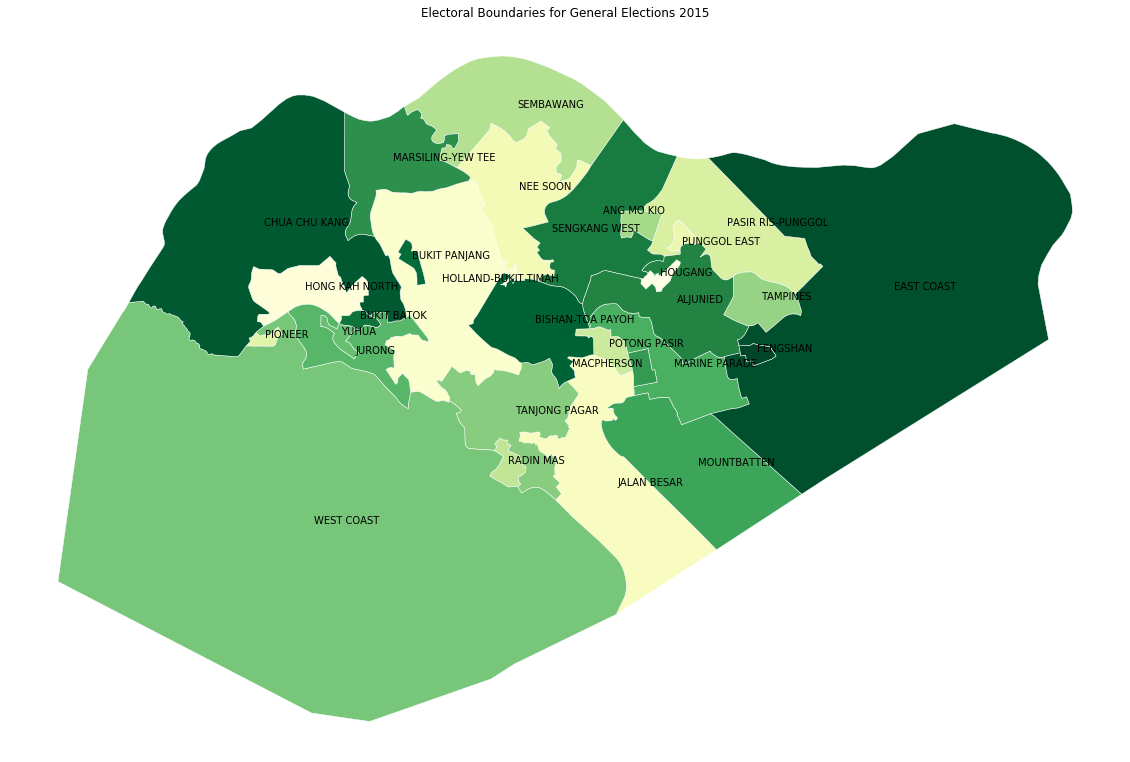

In [31]:
# electoral boundaries for GE2015 with labels
bd2015.plot(figsize = (20, 20), cmap = 'YlGn', edgecolor = "white", linewidth = 0.5)
plt.title('Electoral Boundaries for General Elections 2015')
plt.axis(False)

# list to store labels and their coordinates
texts = []
# iterating through dataframe
for x, y, label in zip(bd2015_cent.geometry.x, bd2015_cent.geometry.y, bd2015_cent['constituency']):
    texts.append(plt.text(x, y, label, fontsize = 10))
# adjusting labels
aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1));

## Heatmap of GE2015 Results

In [32]:
# joining the vote percentage results of PAP with the electoral boundaries
# changing constituency column in pap2015 to uppercase so that we can merge with the bd2015 data
pap2015['constituency'] = pap2015['constituency'].str.upper()
# merging the 2 data frames
papbd2015 = bd2015.merge(pap2015, on='constituency')
# verifying the merge
papbd2015.head()

,Name,Description,geometry,constituency,centroid,year,constituency_type,candidates,party,vote_count,vote_percentage
0,kml_1,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((103.90079 1.36946 0.00000, 103.900...",HOUGANG,POINT (103.89491 1.36840),2015,SMC,Lee Hong Chuang,PAP,9565,42.34
1,kml_2,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((103.73560 1.37561 0.00000, 103.735...",HONG KAH NORTH,POINT (103.72063 1.36192),2015,SMC,Amy Khor Lean Suan,PAP,19628,74.76
2,kml_3,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((103.80590 1.41110 0.00000, 103.806...",HOLLAND-BUKIT TIMAH,POINT (103.78783 1.36584),2015,GRC,Christopher De Souza | Liang Eng Hwa | Sim Ann...,PAP,62786,66.60
3,kml_4,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((103.86500 1.32931 0.00000, 103.865...",JALAN BESAR,POINT (103.87372 1.26527),2015,GRC,Heng Chee How | Lily Neo | Denise Phua Lay Pen...,PAP,63644,67.75
4,kml_5,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((103.84053 1.44203 0.00000, 103.840...",NEE SOON,POINT (103.82576 1.41072),2015,GRC,K Shanmugam | Kwek Hian Chuan | Lee Bee Wah | ...,PAP,82287,66.83


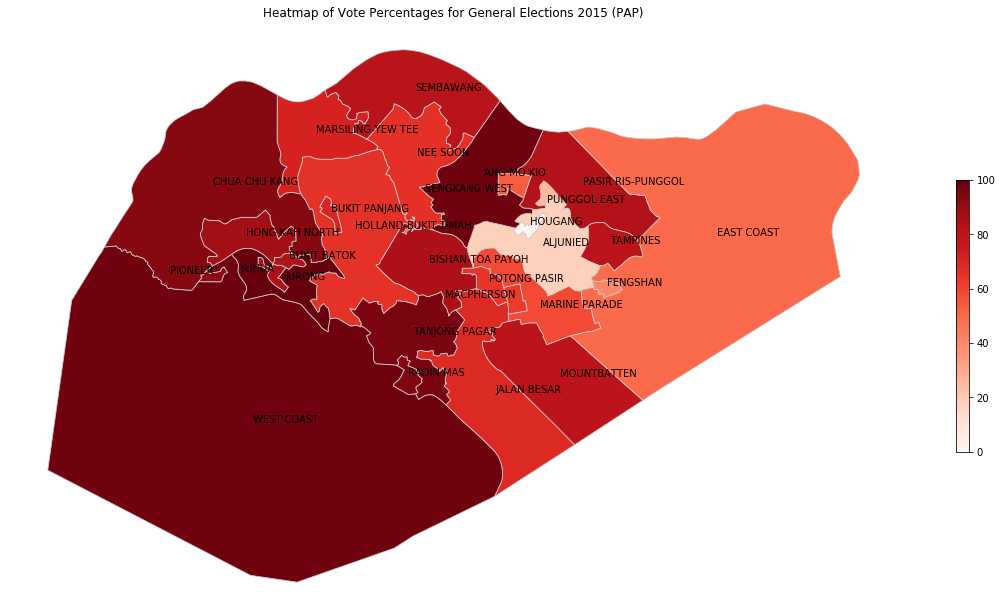

In [33]:
# heat map of vote percentages for GE2015 in the perspective of the PAP
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_title('Heatmap of Vote Percentages for General Elections 2015 (PAP)')
ax.axis(False)
# defining the ScalarMappable for colour bar 
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(0, 100))
# plotting the colour bar
cbar = fig.colorbar(sm, shrink = 0.25)
cbar.ax.tick_params(labelsize=10)
# plotting the heatmap 
papbd2015.plot('vote_percentage', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(20,20))
# list to store labels and their coordinates
texts = []
# iterating through dataframe
for x, y, label in zip(bd2015_cent.geometry.x, bd2015_cent.geometry.y, bd2015_cent['constituency']):
    texts.append(plt.text(x, y, label, fontsize = 10))
# adjusting labels
aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1));

From the heatmap, it is easy to see that the constituencies which the PAP are highly favoured are West Coast, Chua Chu Kang, Ang Mo Kio while the constituencies which the PAP is less favoured are Aljunied and Hougang. Aljunied and Hougang were in fact constituencies won by the Workers' Party. 

## Obtaining the GE2020 data set

There is no downloadable data for GE2020 from [data.gov.sg](https://data.gov.sg/) at the moment. As such, we will scrape the data from [Elections Department Singapore](https://www.eld.gov.sg/finalresults2020.html) using BeautifulSoup. 

There are a total of 17 GRCs and 14 SMCs to be contested for in the General Elections 2020. The electoral boundaries for GE2020 are very different from GE2015. Different parts of towns were abosorbed or carved out to other constituencies, the most significant being the establishment of a new GRC, Sengkang GRC, formed from Punggol East SMC, eastern portions of Sengkang West SMC, and Sengkang Central from Pasir Ris–Punggol GRC.

In [34]:
url = 'https://www.eld.gov.sg/finalresults2020.html'
request = requests.get(url)
html_page = request.content

In [35]:
soup = BeautifulSoup(html_page, 'html.parser')

In [36]:
# extracting contituencies for GE2020
constituency_list = soup.find_all('h3')
constituency_list = [str(x).split('>')[1].split('<')[0].upper() for x in constituency_list]

In [37]:
# extracting parties for GE2020 
party = soup.find_all('a')[30:]
party = [str(x).split('>')[1].split('<')[0] for x in party]

In [38]:
# extracting the candidates 
cand = soup.find_all('td')
candidates = []
for i in range(0, len(cand), 3):
    candidates.append(cand[i])
candidates = [str(x).replace('<td>', '').replace('</td>', '').replace('<br/>', ', ').replace(', \n', '') for x in candidates]

In [39]:
# extracting vote count
vote_ct = soup.find_all('td')
vote_count = []
for i in range(2, len(vote_ct), 3):
    vote_count.append(vote_ct[i])
vote_count = [int(str(x).split('<br/>(')[0].split('<td>')[1].replace(',', '')) for x in vote_count]

In [40]:
# extracting vote percentages
vote_pct = soup.find_all('td')
vote_percentage = []
for i in range(2, len(vote_pct), 3):
    vote_percentage.append(vote_pct[i])
vote_percentage = [float(str(x).split('<br/>(')[1].split('%')[0]) for x in vote_percentage]

In [41]:
# fitting constituencies into list of length 64
three_parties = ['PASIR RIS-PUNGGOL', 'PIONEER']
constituency = []
for i in range(len(constituency_list)):
    if constituency_list[i] not in three_parties:
        constituency.append(constituency_list[i])
        constituency.append(constituency_list[i])
    else:
        constituency.append(constituency_list[i])
        constituency.append(constituency_list[i])
        constituency.append(constituency_list[i])

In [42]:
# list of 14 SMCs
smc = ['Bukit Batok', 'Bukit Panjang', 'Hong Kah North', 'Hougang', 'Kebun Baru', 'MacPherson', 'Marymount', 'Mountbatten',
      'Pioneer', 'Potong Pasir', 'Punggol West', 'Radin Mas', 'Yio Chu Kang', 'Yuhua']
smc = [x.upper() for x in smc]

In [43]:
# creating dataframe using the information we have scraped 
df2020 = pd.DataFrame({'constituency': constituency, 'candidates': candidates, 'party': party, 'vote_count': vote_count, 'vote_percentage': vote_percentage})
# adding the year column
df2020['year'] = [2020 for x in range(df2020.shape[0])]
# adding the constituency type
df2020['constituency_type'] = ['SMC' if x in smc else 'GRC' for x in df2020['constituency']]
# rearranging the columns to match the 2015 dataframe
df2020 = df2020[list(df2015.columns)]

In [44]:
# exporting the dataframe for future use
df2020.to_csv('GE2020_results.csv', index=False)

## Looking through the GE2020 data set 

In [45]:
# verifying the dataframe
df2020.head()

,year,constituency,constituency_type,candidates,party,vote_count,vote_percentage
0,2020,ALJUNIED,GRC,"CHAN HUI YUH, CHUA ENG LEONG, VICTOR LYE THIAM...",PAP,57330,40.05
1,2020,ALJUNIED,GRC,"GERALD GIAM YEAN SONG, SYLVIA LIM, MUHAMAD FAI...",WP,85815,59.95
2,2020,ANG MO KIO,GRC,"DARRYL DAVID, GAN THIAM POH, LEE HSIEN LOONG, ...",PAP,124597,71.91
3,2020,ANG MO KIO,GRC,"KENNETH ANDREW JEYARETNAM, NORAINI BTE YUNUS, ...",RP,48677,28.09
4,2020,BISHAN-TOA PAYOH,GRC,"CHEE HONG TAT, CHONG KEE HIONG, NG ENG HEN, SA...",PAP,62983,67.23


In [46]:
# checking data types 
df2020.dtypes

year                   int64
constituency          object
constituency_type     object
candidates            object
party                 object
vote_count             int64
vote_percentage      float64
dtype: object

In [47]:
# checking for missing data
df2020.isnull().sum()

year                 0
constituency         0
constituency_type    0
candidates           0
party                0
vote_count           0
vote_percentage      0
dtype: int64

In [48]:
# different parties; '-' here refers to Independent candidate 
df2020['party'].unique()

array(['PAP', 'WP', 'RP', 'SPP', 'SDP', 'PSP', 'PV', 'RDU', 'PPP', 'SDA',
       '-', 'NSP'], dtype=object)

We see a net increase of 2 in the number of parties, bringing us to a total of 11 parties and independent candidates contesting this GE2020. We have 3 new parties, Progress Singapore Party (PSP), People's Voice (PV) and Red Dot United (RDU) established after GE2015 and the departure of Singaporeans First (SF) dissolved in June 2020. 

In [49]:
# independent candidates
df2020[df2020['party'] == '-']

,year,constituency,constituency_type,candidates,party,vote_count,vote_percentage
41,2020,PIONEER,SMC,CHEANG PENG WAH,-,655,2.78


In [50]:
# replacing '-' with Independent
df2020.loc[41, 'party'] = 'Independent'
df2020.loc[41, 'party']

'Independent'

We have only 1 independent candidate contesting for Pioneer this GE2020.

In [128]:
# total number of votes
df2020['vote_count'].sum()

2494537

The total votes have increased from 2260379 in 2015 to 2494537 in 2020.

In [51]:
# extracting PAP data by constituency
pap2020 = df2020[df2020['party'] == 'PAP']
pap2020.head()

,year,constituency,constituency_type,candidates,party,vote_count,vote_percentage
0,2020,ALJUNIED,GRC,"CHAN HUI YUH, CHUA ENG LEONG, VICTOR LYE THIAM...",PAP,57330,40.05
2,2020,ANG MO KIO,GRC,"DARRYL DAVID, GAN THIAM POH, LEE HSIEN LOONG, ...",PAP,124597,71.91
4,2020,BISHAN-TOA PAYOH,GRC,"CHEE HONG TAT, CHONG KEE HIONG, NG ENG HEN, SA...",PAP,62983,67.23
7,2020,BUKIT BATOK,SMC,MURALI PILLAI,PAP,15500,54.80
8,2020,BUKIT PANJANG,SMC,LIANG ENG HWA,PAP,18085,53.73


In [52]:
# checking the highest vote_count for PAP
pap2020[pap2020['vote_count'] == pap2020['vote_count'].max()]

,year,constituency,constituency_type,candidates,party,vote_count,vote_percentage
2,2020,ANG MO KIO,GRC,"DARRYL DAVID, GAN THIAM POH, LEE HSIEN LOONG, ...",PAP,124597,71.91


Ang Mo Kio remains to be the constituency which the PAP has the most support.

In [53]:
# extracting Opposition data by constituency
opp2020 = df2020[df2020['party'] != 'PAP']
opp2020.head()

,year,constituency,constituency_type,candidates,party,vote_count,vote_percentage
1,2020,ALJUNIED,GRC,"GERALD GIAM YEAN SONG, SYLVIA LIM, MUHAMAD FAI...",WP,85815,59.95
3,2020,ANG MO KIO,GRC,"KENNETH ANDREW JEYARETNAM, NORAINI BTE YUNUS, ...",RP,48677,28.09
5,2020,BISHAN-TOA PAYOH,GRC,"STEVE CHIA, MELVYN CHIU, WILLIIAMSON LEE, OSMA...",SPP,30696,32.77
6,2020,BUKIT BATOK,SMC,CHEE SOON JUAN,SDP,12787,45.20
9,2020,BUKIT PANJANG,SMC,PAUL ANANTH TAMBYAH,SDP,15576,46.27


In [54]:
# checking the highest vote_count for Opposition parties
opp2020[opp2020['vote_count'] == opp2020['vote_count'].max()]

,year,constituency,constituency_type,candidates,party,vote_count,vote_percentage
1,2020,ALJUNIED,GRC,"GERALD GIAM YEAN SONG, SYLVIA LIM, MUHAMAD FAI...",WP,85815,59.95


Likewise, the Workers' party is still getting strong support from Aljunied, both vote counts and vote percentages went up from GE2015. 

## Results from GE2020

Here we can reuse the function we have written earlier to view the results for the GRCs and SMCs.

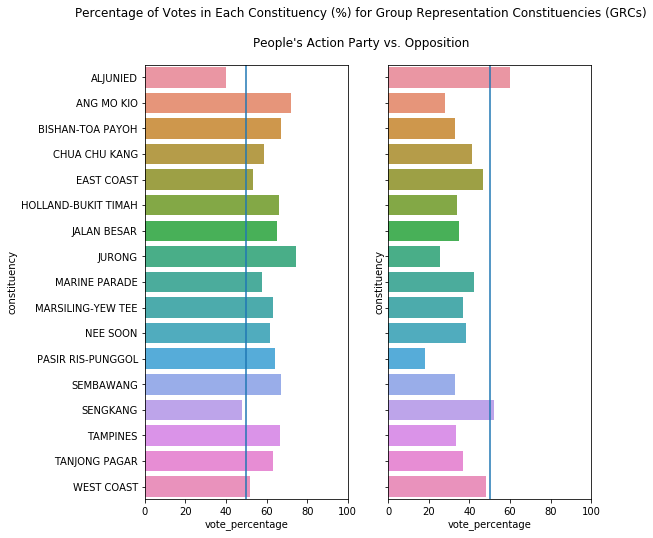

In [55]:
# plot of vote percentages between the PAP and the other opposition parties for GRCs
subplot_results(pap2020, opp2020, 'GRC')

The most significant result for the GE2020 was the Workers' Party winning the newly established Sengkang GRC, bringing the number of GRCs won by the opposition to 2 from 1 in the GE2015. 

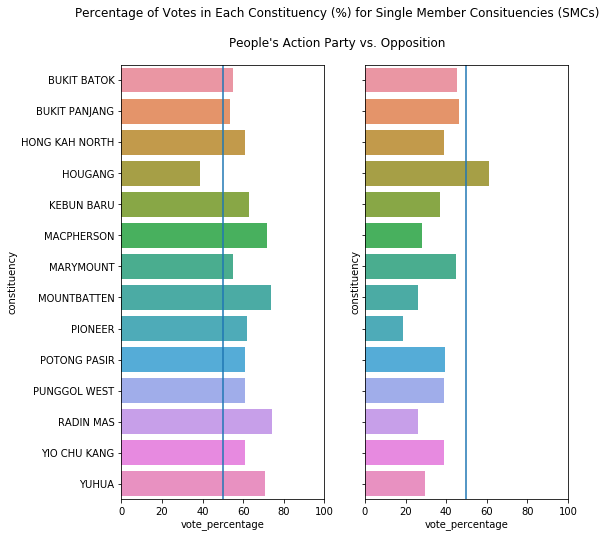

In [56]:
# plot of vote percentages between the PAP and the other opposition parties for GRCs
subplot_results(pap2020, opp2020, 'SMC')

The change in the SMCs did not really affect the winning parties for SMCs, with the Workers' Party maintaining strong support in Hougang. 

In [57]:
opp2020[opp2020['vote_percentage'] > 50]

,year,constituency,constituency_type,candidates,party,vote_count,vote_percentage
1,2020,ALJUNIED,GRC,"GERALD GIAM YEAN SONG, SYLVIA LIM, MUHAMAD FAI...",WP,85815,59.95
19,2020,HOUGANG,SMC,DENNIS TAN LIP FONG,WP,15451,61.21
53,2020,SENGKANG,GRC,"CHUA KHENG WEE, HE TING RU, JAMUS JEROME LIM, ...",WP,60217,52.12


Overall, the Workers' Party won 2 GRCs and 1 SMC giving them 10 seats in the Parliament. 

In [58]:
# function to plot subplots between the results of GE2015 and GE2020
def subplot_compare(df_2015, df_2020, div_type):
    fig, ax = plt.subplots(1, 2, figsize=(8, 8), sharex=True, sharey=False)
    ax[0].set_xlim(0, 100)
    
    # title
    if div_type == 'GRC':
        fig.suptitle('Percentage of Votes in Each Constituency (%) for Group Representation Constituencies (GRCs)\n\n' + "2015 vs. 2020")
    else:
        fig.suptitle('Percentage of Votes in Each Constituency (%) for Single Member Consituencies (SMCs)\n\n' + "2015 vs. 2020")

    # plotting GE2015 vote percentages for electorial division type
    sns.barplot(y = df_2015[df_2015['constituency_type'] == div_type]['constituency'], x = df_2015['vote_percentage'], ax=ax[0], ci=None)
    # 50% vertical line
    ax[0].axvline(50)
    
    # plotting GE2020 vote percentages for electorial division type
    sns.barplot(y = df_2020[df_2020['constituency_type'] == div_type]['constituency'], x = df_2020['vote_percentage'], ax=ax[1], ci=None)
    # 50% vertical line
    ax[1].axvline(50)
    ax[1].yaxis.tick_right()

    
    return

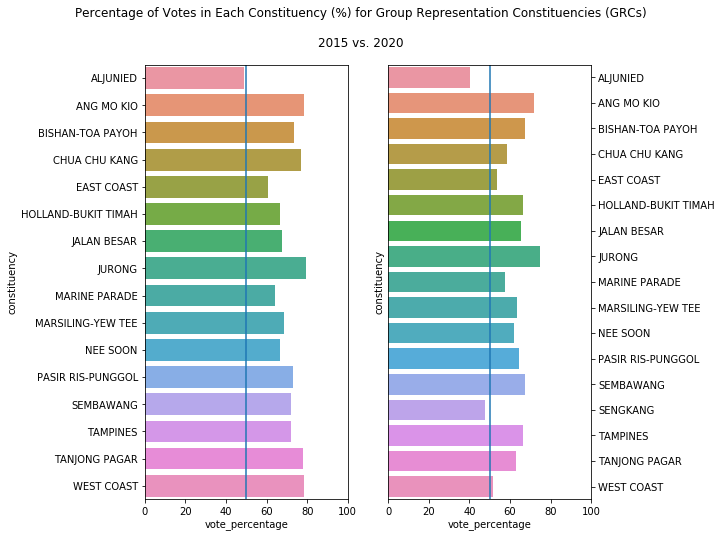

In [59]:
subplot_compare(pap2015, pap2020, 'GRC')

While we cannot compare each constituency directly due to the changes in consituencies, but we do see that there is a general decrease in the vote percentages across GRCs from GE2015 to GE2020. 

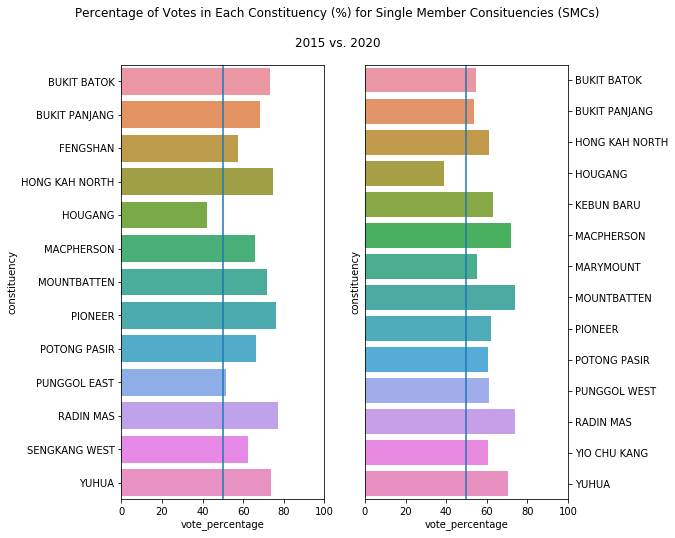

In [60]:
subplot_compare(pap2015, pap2020, 'SMC')

PAP manages to win 13 SMCs only losing Hougang to the Workers' Party, where the Workers' Party is highly favoured in. There were some marginal wins at Bukit Batok, Bukit Panjang and Marymount. The Opposition parties in those areas might have been favoured by the new voters who became eligible to vote this election. 

In [61]:
pap2020[(pap2020['vote_percentage'] > 50) & (pap2020['vote_percentage'] < 60)]

,year,constituency,constituency_type,candidates,party,vote_count,vote_percentage
7,2020,BUKIT BATOK,SMC,MURALI PILLAI,PAP,15500,54.80
8,2020,BUKIT PANJANG,SMC,LIANG ENG HWA,PAP,18085,53.73
11,2020,CHUA CHU KANG,GRC,"GAN KIM YONG, LOW YEN LING, DON WEE, ZHULKARNA...",PAP,59554,58.64
13,2020,EAST COAST,GRC,"CHERYL CHAN WEI LING, HENG SWEE KEAT, MOHD MAL...",PAP,61144,53.39
29,2020,MARINE PARADE,GRC,"MOHD FAHMI ALIMAN, SEAH KIAN PENG, TAN CHUAN-J...",PAP,75203,57.74
33,2020,MARYMOUNT,SMC,GAN SIOW HUANG,PAP,12173,55.04
58,2020,WEST COAST,GRC,"ANG WEI NENG, FOO MEE HAR, DESMOND LEE TI-SENG...",PAP,71658,51.68


We can see that there is overall increase the number of marginal wins for the PAP in GE2020, up from 2 SMCs in GE2015 to 3 SMCs and 4 GRCs in GE2020. 

## Electoral Boundaries GE2020

In [62]:
# reading the geographical data of GE2020
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
bd2020 = gpd.read_file('doc.kml', driver='KML')

In [63]:
# verifying the top 5 rows
bd2020.head()

,Name,Description,geometry
0,RADIN MAS,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((103.82485 1.26600 0.00000, 1..."
1,MOUNTBATTEN,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((103.92027 1.30079 0.00000, 1..."
2,TANJONG PAGAR,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((103.84580 1.26163 0.00000, 1..."
3,JALAN BESAR,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((103.87383 1.28217 0.00000, 1..."
4,MACPHERSON,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((103.88182 1.31494 0.00000, 1..."


In [64]:
# renaming Name to 'constituency' to merge with GE2020 results
bd2020 = bd2020.rename(columns = {'Name': 'constituency'})

In [65]:
# creating a 'centroid' column for labelling
bd2020['centroid'] = bd2020['geometry'].centroid

In [66]:
# verifying the columns
bd2020.head()

,constituency,Description,geometry,centroid
0,RADIN MAS,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((103.82485 1.26600 0.00000, 1...",POINT (103.82015 1.27598)
1,MOUNTBATTEN,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((103.92027 1.30079 0.00000, 1...",POINT (103.88393 1.29796)
2,TANJONG PAGAR,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((103.84580 1.26163 0.00000, 1...",POINT (103.82306 1.30169)
3,JALAN BESAR,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((103.87383 1.28217 0.00000, 1...",POINT (103.85724 1.30020)
4,MACPHERSON,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((103.88182 1.31494 0.00000, 1...",POINT (103.88607 1.32402)


In [67]:
# creating another dataframe to set points for labels
bd2020_cent = bd2020.set_geometry('centroid')
bd2020_cent.head()

,constituency,Description,geometry,centroid
0,RADIN MAS,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((103.82485 1.26600 0.00000, 1...",POINT (103.82015 1.27598)
1,MOUNTBATTEN,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((103.92027 1.30079 0.00000, 1...",POINT (103.88393 1.29796)
2,TANJONG PAGAR,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((103.84580 1.26163 0.00000, 1...",POINT (103.82306 1.30169)
3,JALAN BESAR,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((103.87383 1.28217 0.00000, 1...",POINT (103.85724 1.30020)
4,MACPHERSON,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((103.88182 1.31494 0.00000, 1...",POINT (103.88607 1.32402)


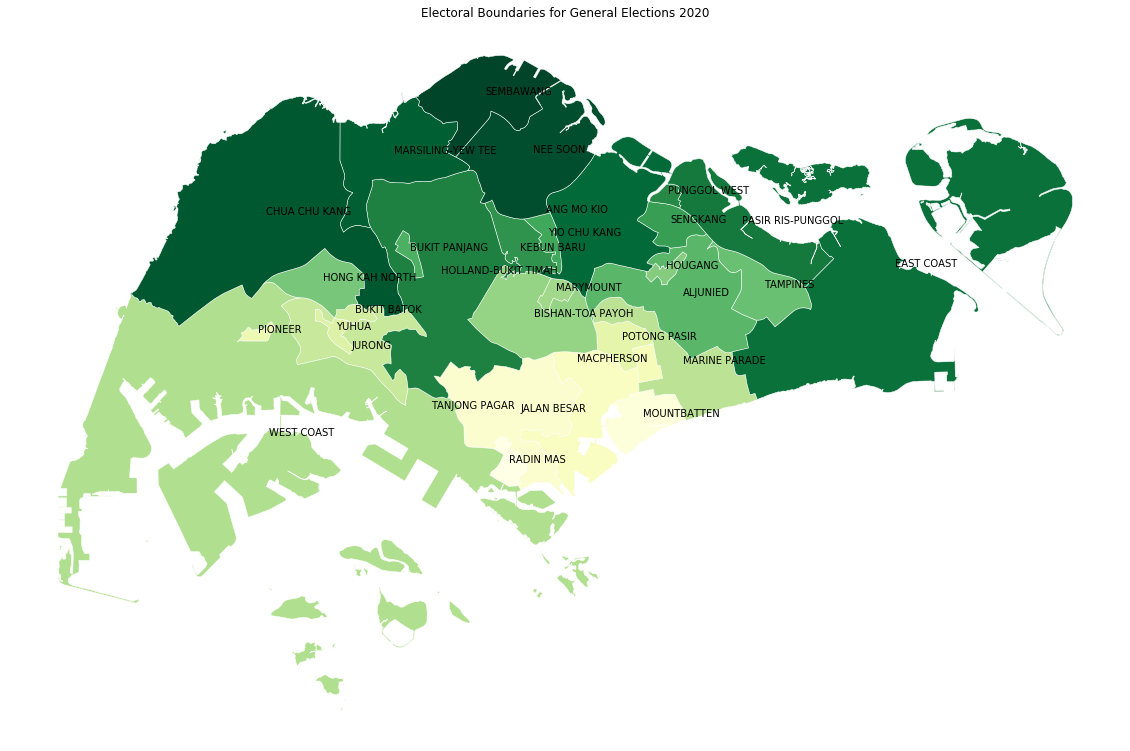

In [68]:
# electoral boundaries for GE2020 with labels
bd2020.plot(figsize = (20, 20), cmap = 'YlGn', edgecolor = "white", linewidth = 0.5)
plt.title('Electoral Boundaries for General Elections 2020')
plt.axis(False)

# list to store labels and their coordinates
texts = []
# iterating through dataframe
for x, y, label in zip(bd2020_cent.geometry.x, bd2020_cent.geometry.y, bd2020_cent['constituency']):
    texts.append(plt.text(x, y, label, fontsize = 10))
# adjusting labels
aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1));

## Heatmap of GE2020 Results

In [69]:
# joining the vote percentage results of PAP with the electoral boundaries
# merging the 2 data frames
papbd2020 = bd2020.merge(pap2020, on='constituency')
# verifying the merge
papbd2020.head()

,constituency,Description,geometry,centroid,year,constituency_type,candidates,party,vote_count,vote_percentage
0,RADIN MAS,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((103.82485 1.26600 0.00000, 1...",POINT (103.82015 1.27598),2020,SMC,MELVIN YONG YIK CHYE,PAP,16864,74.01
1,MOUNTBATTEN,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((103.92027 1.30079 0.00000, 1...",POINT (103.88393 1.29796),2020,SMC,LIM BIOW CHUAN,PAP,16285,73.82
2,TANJONG PAGAR,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((103.84580 1.26163 0.00000, 1...",POINT (103.82306 1.30169),2020,GRC,"CHAN CHUN SING, ERIC CHUA SWEE LEONG, INDRANEE...",PAP,78330,63.10
3,JALAN BESAR,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((103.87383 1.28217 0.00000, 1...",POINT (103.85724 1.30020),2020,GRC,"HENG CHEE HOW, DENISE PHUA LAY PENG, JOSEPHINE...",PAP,64631,65.36
4,MACPHERSON,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((103.88182 1.31494 0.00000, 1...",POINT (103.88607 1.32402),2020,SMC,TIN PEI LING,PAP,19009,71.74


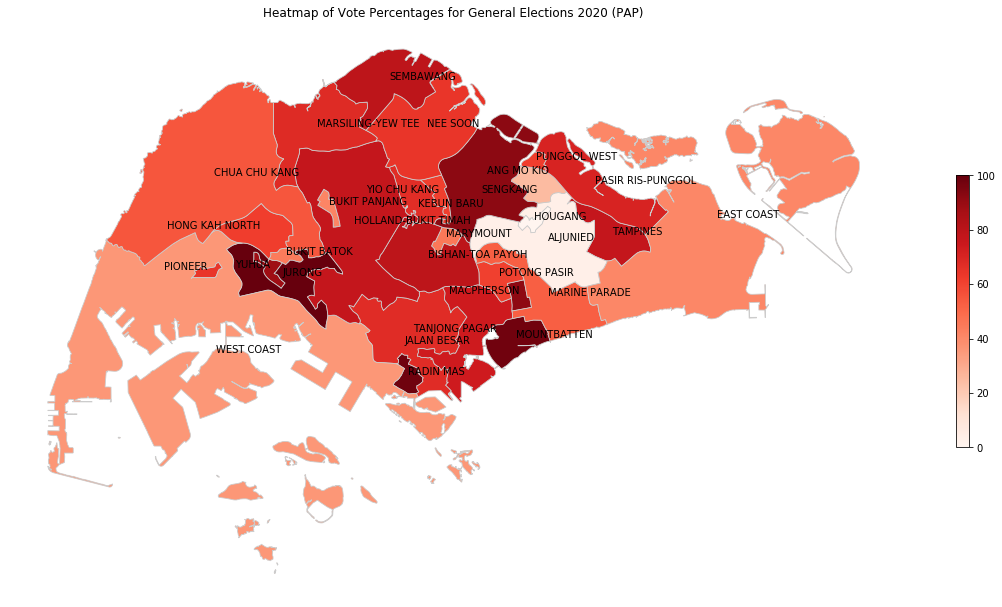

In [70]:
# heat map of vote percentages for GE2020 in the perspective of the PAP
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_title('Heatmap of Vote Percentages for General Elections 2020 (PAP)')
ax.axis(False)
# defining the ScalarMappable for colour bar 
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(0, 100))
# plotting the colour bar
cbar = fig.colorbar(sm, shrink = 0.25)
cbar.ax.tick_params(labelsize=10)
# plotting the heatmap 
papbd2020.plot('vote_percentage', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(20,20))
# list to store labels and their coordinates
texts = []
# iterating through dataframe
for x, y, label in zip(bd2020_cent.geometry.x, bd2020_cent.geometry.y, bd2020_cent['constituency']):
    texts.append(plt.text(x, y, label, fontsize = 10))
# adjusting labels
aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1));

## Interactive Map Using Folium 

We will use folium to plot an interactive map to display results of the GE2020. 

In [108]:
# creating map object
m = folium.Map(location=[1.3521, 103.8198], zoom_start=12, min_zoom=11,  max_zoom=13)

In [73]:
# creating list of WP constituencies
wp_constituencies = pap2020[pap2020['vote_percentage'] < 50]['constituency']
wp_constituencies = [x for x in wp_constituencies]

In [112]:
# creating markers and plotting results for each constituency
for c in papbd2020.constituency.unique():
    
    # creating vega charts with altair for c
    result = df2020[df2020['constituency'] == c][['party', 'vote_percentage']]
    bar = alt.Chart(df2020[df2020['constituency'] == c][['party', 'vote_percentage']], width=300).mark_bar().encode(x='vote_percentage', y='party').properties(title = 'GE2020 Results for ' + c )
    vega = folium.features.VegaLite(bar, width='100%', height='100%')
    
    if c not in wp_constituencies:
        # create marker
        marker = folium.Marker([papbd2020[papbd2020['constituency'] == c].centroid.y, papbd2020[papbd2020['constituency'] == c].centroid.x],
                      tooltip=c,
                      icon=folium.Icon(color='red', icon='bolt', prefix='fa'))
        # create popup 
        popup = folium.Popup()
        # adding vega to popup
        vega.add_to(popup)
        # adding popup to marker
        popup.add_to(marker)
        # adding marker to map
        marker.add_to(m)

    else:
        # create marker
        marker = folium.Marker([papbd2020[papbd2020['constituency'] == c].centroid.y, papbd2020[papbd2020['constituency'] == c].centroid.x],
                      tooltip=c,
                      icon=folium.Icon(color='blue', icon='gavel', prefix='fa'))
        # create popup 
        popup = folium.Popup()
        # adding vega to popup
        vega.add_to(popup)
        # adding popup to marker
        popup.add_to(marker)
        # adding marker to map
        marker.add_to(m)

In [113]:
# interactive plot of GE2020 results
# click on the markers to view results for each constituency
m

In [114]:
# saving map
m.save('ge2020_map.html')

## Final Thoughts

Using graphical and geographical visualisations, political parties can study trends to come up with strategies on where to put their strongest members to either hold their forts or make an attempt to win more GRCs/SMCs. While the PAP has seen a drop in their overall vote percentage 61.2% in GE2020 compared to 69.9% in GE2015, they remain in power taking up 83 seats out of 93 in the Parliament. 

Notice that the areas won by the WP in the GE2020 were all neighbouring constituencies. It is likely that they will try to contest for Pungol West and Marine again the next GE. 